In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Load the data from london_weather.csv to understand its contents

In [3]:
df =  pd.read_csv('london_weather.csv')

In [34]:
print(df.head())

        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  year  month  
0      -7.5            0.4  101900.0         9.0  1979      1  
1      -7.5            0.0  102530.0         8.0  1979      1  
2      -7.2            0.0  102050.0         4.0  1979      1  
3      -6.5            0.0  100840.0         2.0  1979      1  
4      -1.4            0.0  102250.0         1.0  1979      1  


Determine the column names, data types, number of non-null vales

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15305 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15305 non-null  datetime64[ns]
 1   cloud_cover       15286 non-null  float64       
 2   sunshine          15305 non-null  float64       
 3   global_radiation  15286 non-null  float64       
 4   max_temp          15305 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15305 non-null  float64       
 7   precipitation     15303 non-null  float64       
 8   pressure          15301 non-null  float64       
 9   snow_depth        13881 non-null  float64       
 10  year              15305 non-null  int64         
 11  month             15305 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 1.5 MB
None


## Data visualization

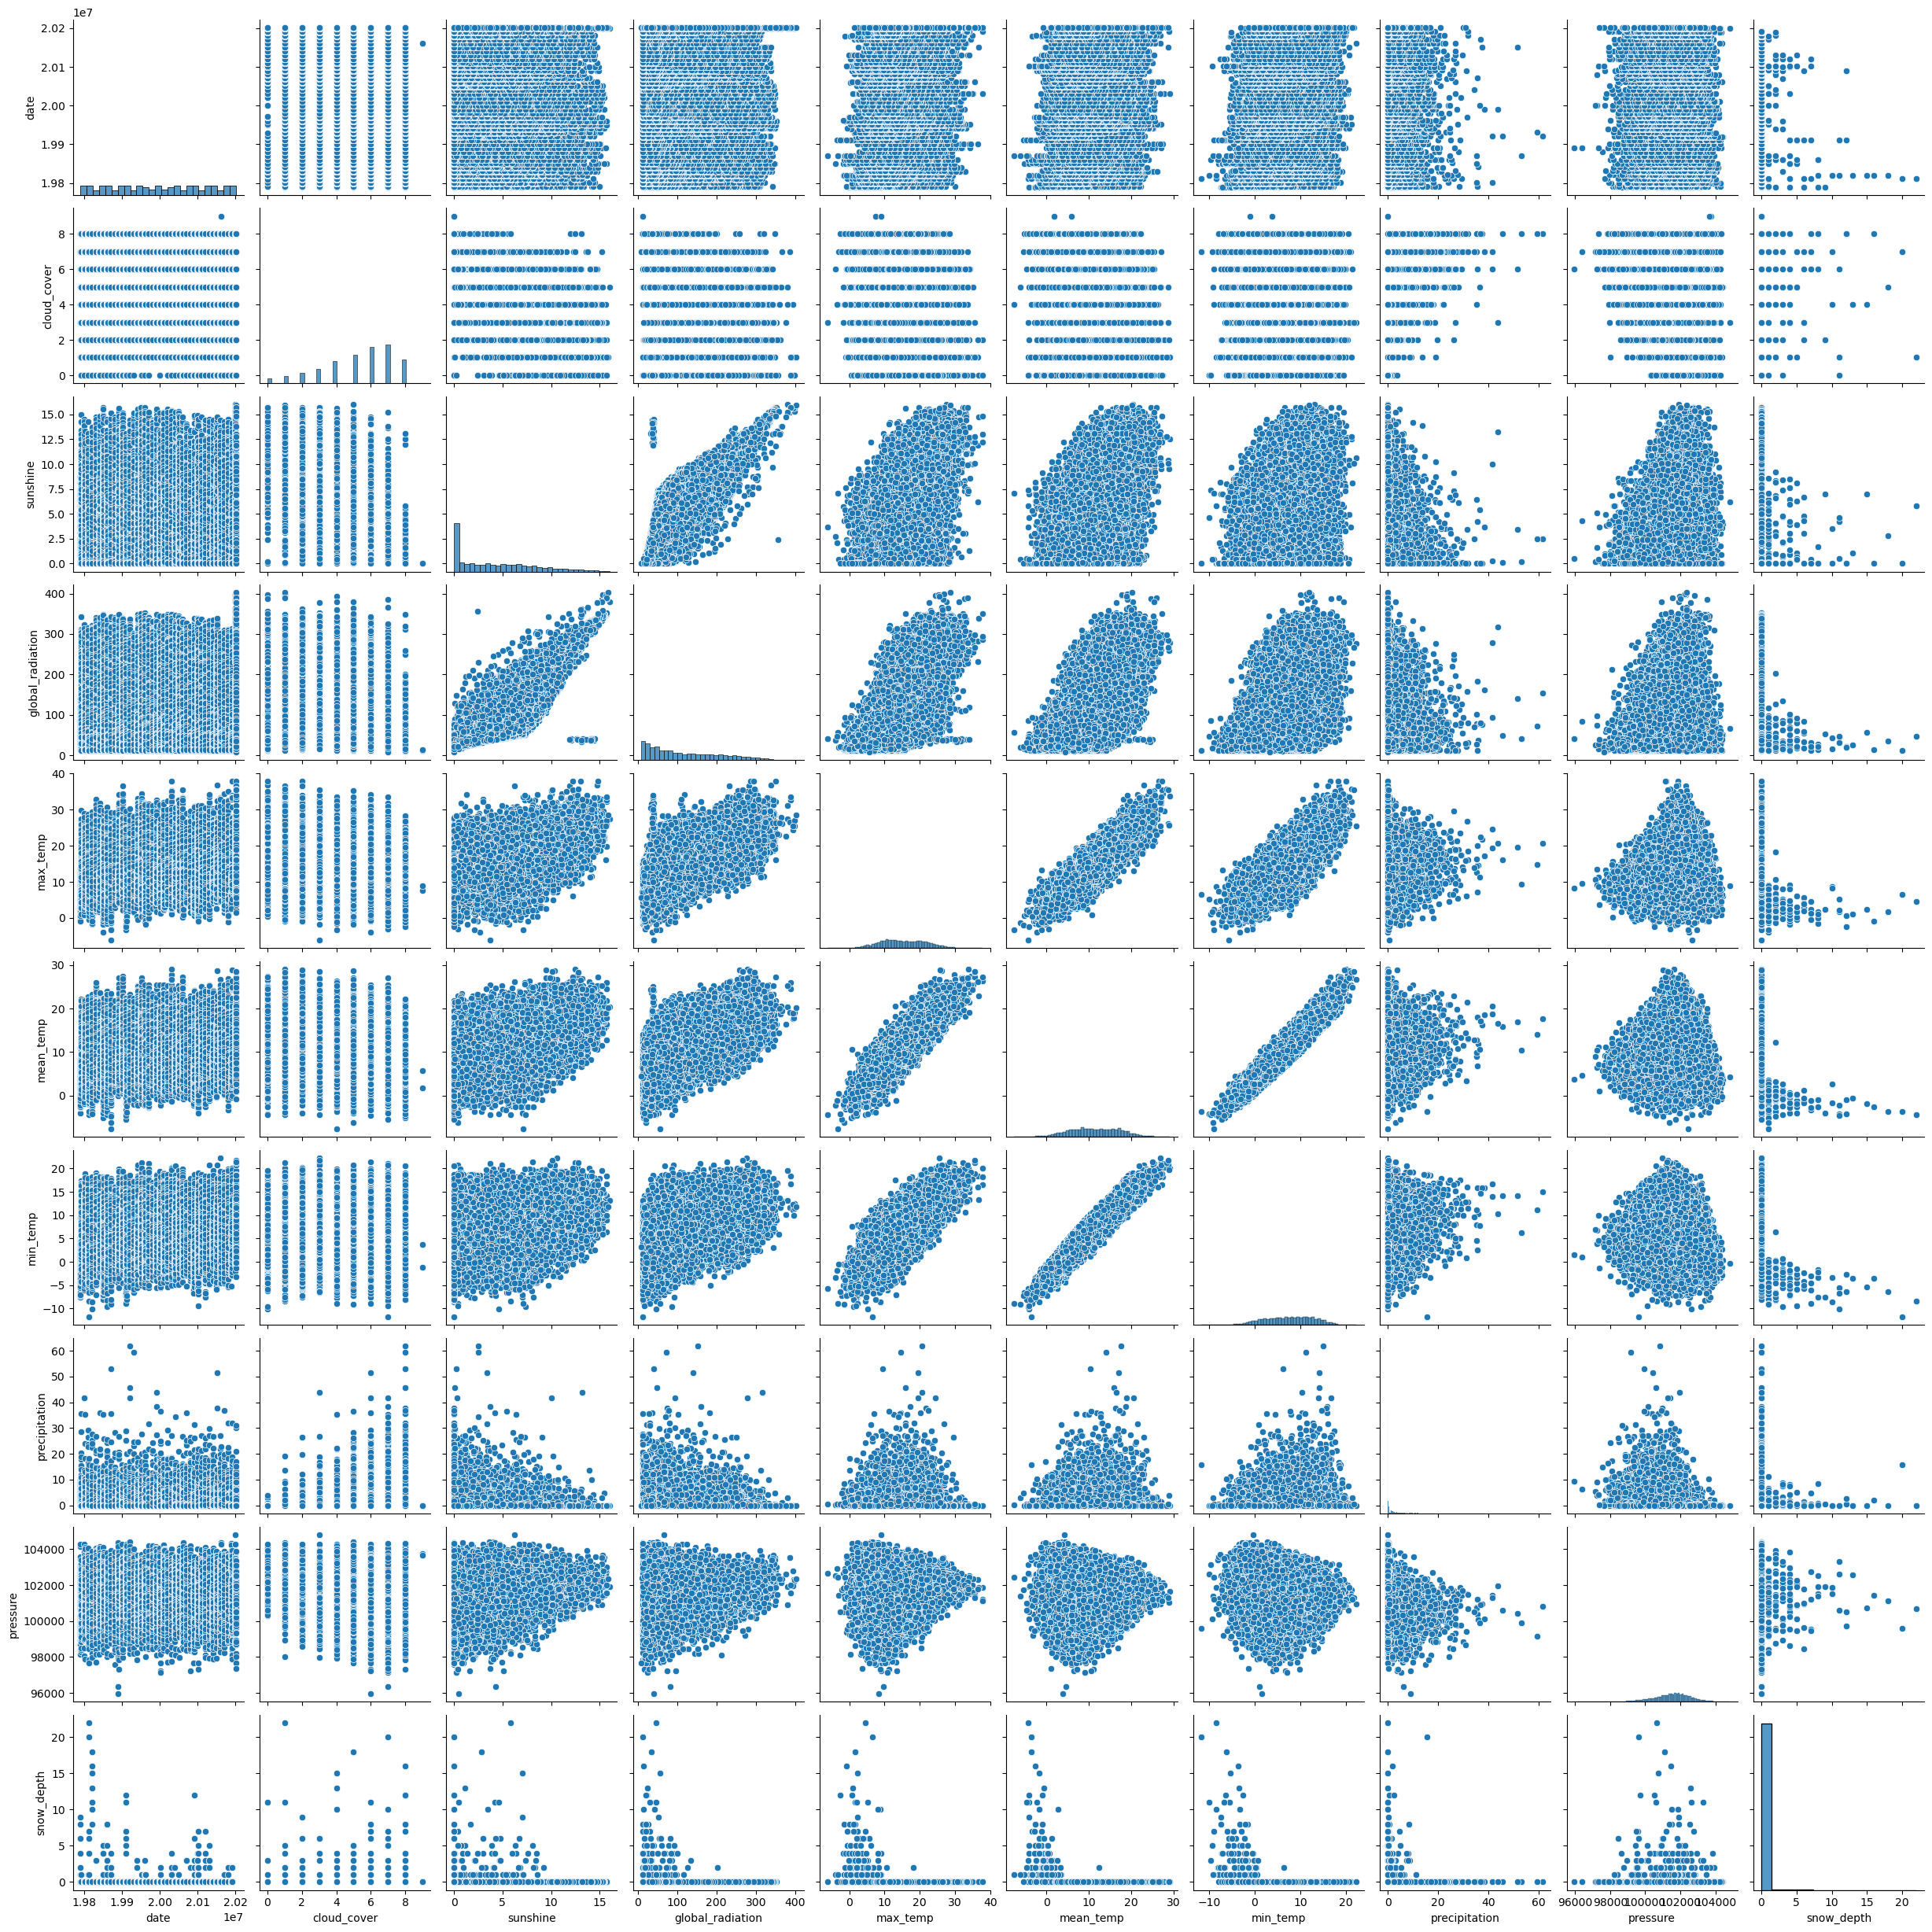

In [6]:
sns.pairplot(df)

### Visualizing temperature
Convert the date column to the datetime data type by passing it to pd.to_datetime(). Use the %Y%m%d format.
You might also want to make a column for the year and month of the date, such that the data can easily be grouped by using .groupby().
The temperature can be visualized by using the lineplot() method.
You can visualize the correlations between features by using the heatmap() and .corr() function.

In [7]:
df.date = pd.to_datetime(df.date,format='%Y%m%d')

In [8]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [9]:
df['year'] = df.date.dt.year

In [10]:
df['month'] = df.date.dt.month

In [11]:
weather_metrics = df.drop(['date','year','month'],axis=1).columns

In [12]:
weather_per_month = df.groupby(['year','month'],as_index=False )[weather_metrics].mean()

In [37]:
weather_per_month.head()

,year,month,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979,1,5.724138,1.887097,29.032258,4.116129,0.616129,-2.551613,1.932258,101214.838710,1.354839
1,1979,2,6.360000,1.889286,45.214286,4.532143,2.042857,-0.428571,1.571429,101163.928571,0.107143
2,1979,3,5.967742,3.212903,93.354839,9.238710,5.587097,1.993548,3.061290,100459.032258,0.032258
3,1979,4,6.133333,3.543333,134.166667,12.520000,8.743333,4.810000,2.586667,101165.333333,0.000000
4,1979,5,5.290323,6.470968,204.064516,16.206452,11.490323,7.151613,2.806452,101362.580645,0.000000


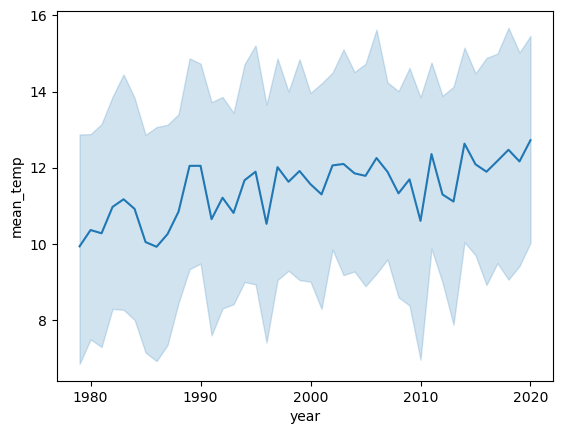

In [14]:
sns.lineplot(x='year',y='mean_temp',data=weather_per_month)
plt.show()

#### visualize the correlations between features by using the heatmap() and .corr() function

<AxesSubplot:>

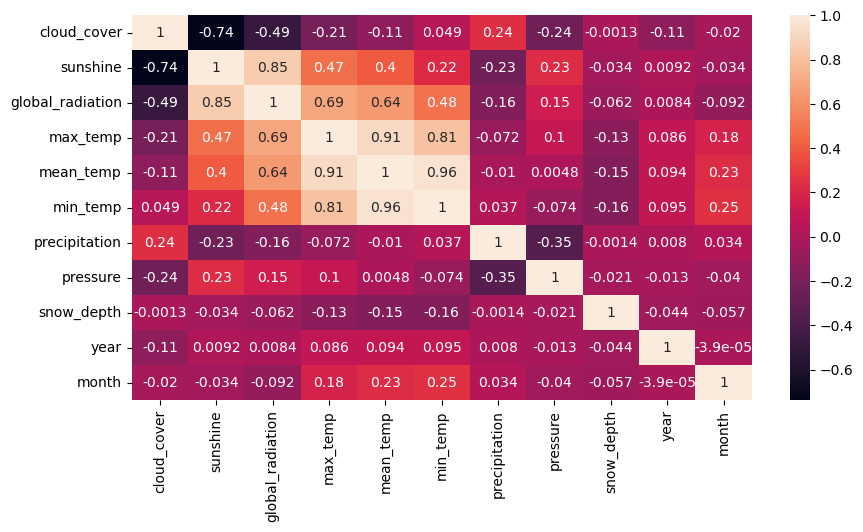

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

Based on the visualizations made in step 2,  pick the appropriate features to predict the mean temperature.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  year              15341 non-null  int64         
 11  month             15341 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 1.4 MB


In [17]:
feature_selection =  ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'


In [18]:
df = df.dropna(subset=['mean_temp'])

In [19]:
# check for missing values

df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               0
mean_temp              0
min_temp               0
precipitation          2
pressure               4
snow_depth          1424
year                   0
month                  0
dtype: int64

### Preprocess data
Use the imputer to account for missing values, and then normalize the features using the scaler. Make sure to split the data into train and test samples at the right moment. These preprocessing steps should go into a pipeline.

In [20]:
def preprocess_data(df,feature_selection,target_var):
    X = df[feature_selection]
    y = df[target_var]
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.33,random_state=1)
    simple_imputer = SimpleImputer(strategy='mean')
    X_train = simple_imputer.fit_transform(X_train)
    X_test = simple_imputer.transform(X_test)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test
    
    
    

In [21]:
X_train,X_test,y_train,y_test = preprocess_data(df,feature_selection,target_var)

### Predict on the test set and evaluate performance

In [22]:
def predict_evaluate(model,x_test,y_test):
    y_pred =  model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_pred,y_test))
    return rmse

In [29]:
# Create an experiment
EXPERIMENT_NAME = 'weather_prediction_'
EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)

#### Predict, evaluate, and log the parameters and metrics of your models

In [32]:
for idx,depth in enumerate([1,2,5,10,20]):
    parameters = {'max_depth':depth}
        
    
    run_name = f"run_{idx}"
    with mlflow.start_run(experiment_id=EXPERIMENT_ID,run_name=run_name):
            #create model-
            lin_reg = LinearRegression().fit(X_train,y_train)
            dt = DecisionTreeRegressor(max_depth=depth).fit(X_train,y_train)
            rf = RandomForestRegressor(max_depth=depth).fit(X_train,y_train)
            # log model
            mlflow.sklearn.log_model(lin_reg,'linear regression')
            mlflow.sklearn.log_model(dt,'Decission Tree')
            mlflow.sklearn.log_model(rf,'Random Forest')
            # evaluate model
            lin_rmse = predict_evaluate(lin_reg,X_test,y_test)
            dt_rmse = predict_evaluate(dt,X_test,y_test)
            rf_rmse = predict_evaluate(rf,X_test,y_test)
            
            # log performance
            mlflow.log_param('max_depth',depth)
            mlflow.log_metric('rmse_linear',lin_rmse)
            mlflow.log_metric('rmse_dt',dt_rmse)
            mlflow.log_metric('rmse_rf',rf_rmse)
            # Search the runs for the experiment's results
    
    
    

In [33]:
experiment_results = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])
experiment_results


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_linear,metrics.rmse_dt,metrics.rmse_rf,params.max_depth,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.source.type
0,1171c764257949a1bda6c19b2ab6af60,272358192189844455,FINISHED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:32:45.820000+00:00,2023-09-10 14:33:05.943000+00:00,3.866773,3.822265,2.892501,20,run_4,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""1171c764257949a1bda6c19b2ab6af60""...",LOCAL
1,1eab42017bcb4d71943f8a27403e4f50,272358192189844455,FINISHED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:32:28.595000+00:00,2023-09-10 14:32:45.802000+00:00,3.866773,3.067126,2.817458,10,run_3,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""1eab42017bcb4d71943f8a27403e4f50""...",LOCAL
2,bec3446b74144ada8ba24c1935e20d23,272358192189844455,FINISHED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:32:12.153000+00:00,2023-09-10 14:32:28.580000+00:00,3.866773,3.027733,2.969500,5,run_2,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""bec3446b74144ada8ba24c1935e20d23""...",LOCAL
3,453853925b5b414998b1cc60b6121672,272358192189844455,FINISHED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:31:55.320000+00:00,2023-09-10 14:32:12.138000+00:00,3.866773,3.917318,3.849071,2,run_1,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""453853925b5b414998b1cc60b6121672""...",LOCAL
4,6623753532e54ec798cb038e16558f73,272358192189844455,FINISHED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:31:39.249000+00:00,2023-09-10 14:31:55.307000+00:00,3.866773,4.752035,4.697937,1,run_0,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""6623753532e54ec798cb038e16558f73""...",LOCAL
5,5dd13b4eaec04d6685b1c2bc35df285f,272358192189844455,FAILED,file:///c:/Users/zero/Desktop/repository/Predi...,2023-09-10 14:29:57.165000+00:00,2023-09-10 14:30:18.426000+00:00,NaN,NaN,NaN,1,run_0,zero,C:\Users\zero\AppData\Roaming\Python\Python39\...,"[{""run_id"": ""5dd13b4eaec04d6685b1c2bc35df285f""...",LOCAL
